In [394]:
import pandas as pd
import numpy as np
df = pd.read_csv("heart_disease1.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,fixed defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,normal,4


In [396]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [398]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [400]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [402]:
df = df.fillna(df.mean())
df.isnull().sum()

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_21616\3263262241.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [403]:
num_col = df.select_dtypes(include = ['float', 'int']).columns  # Numerical Variables

cat_col = df.select_dtypes(include = ['object']).columns # Categorical Variables

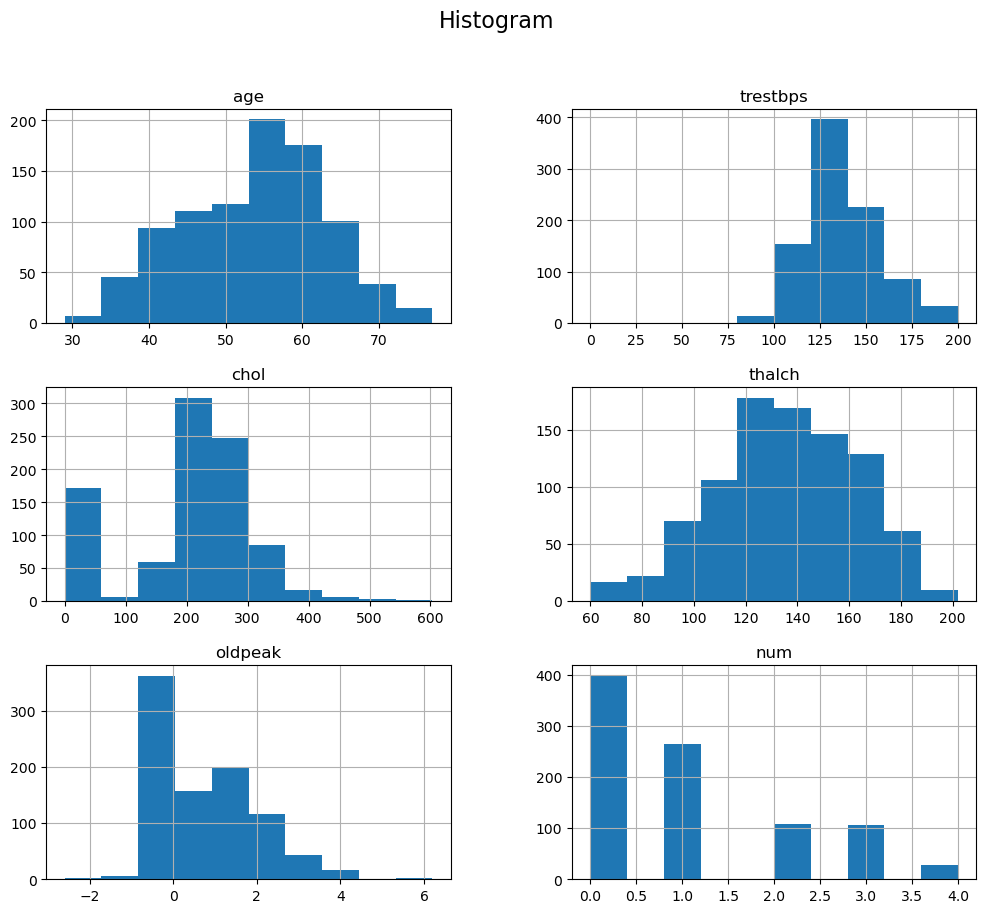

In [404]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
df.hist(figsize=(12, 10))
plt.suptitle("Histogram", fontsize=16)
plt.show()

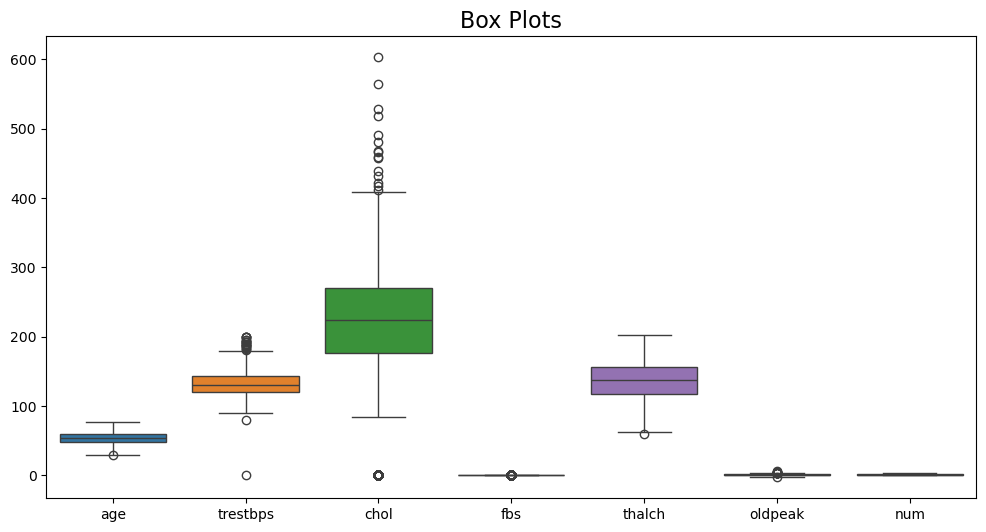

In [405]:
# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Box Plots", fontsize=16)
plt.show()

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_21616\1735122572.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


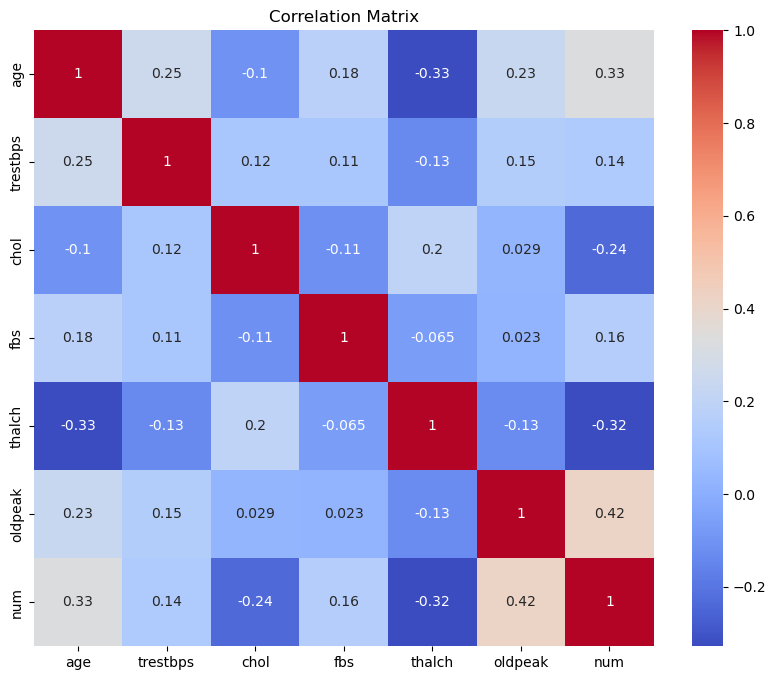

In [406]:
# Correlation Matrix 
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [407]:
# Feature Engineering
from sklearn.preprocessing import StandardScaler, OneHotEncoder
OHE = OneHotEncoder(handle_unknown='ignore')
dummy = OHE.fit_transform(df[cat_col]).toarray()
data_df = pd.DataFrame(dummy, columns=OHE.get_feature_names_out(cat_col))
df = df.drop(cat_col, axis=1)
df = pd.concat([df, data_df], axis=1)
df

,age,trestbps,chol,fbs,thalch,oldpeak,num,sex_Female,sex_Male,cp_asymptomatic,...,restecg_st-t abnormality,exang_FALSE,exang_TRUE,exang_TURE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145,233,True,150,2.300000,0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,41,135,203,False,132,0.000000,0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,57,140,192,False,148,0.400000,0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,52,118,186,False,190,0.000000,0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,57,110,201,False,126,1.500000,0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,125,0,False,120,1.500000,4,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
904,62,166,170,False,120,3.000000,4,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
905,56,170,0,False,123,2.500000,4,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
906,56,144,208,True,105,0.891253,4,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [408]:
scaler = StandardScaler()
df[num_col] = scaler.fit_transform(df[num_col])
df

,age,trestbps,chol,fbs,thalch,oldpeak,num,sex_Female,sex_Male,cp_asymptomatic,...,restecg_st-t abnormality,exang_FALSE,exang_TRUE,exang_TURE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,1.006027,0.567394,0.281297,True,0.524183,1.334996e+00,-0.881977,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,-1.397560,0.076967,0.013526,False,-0.147705,-8.445938e-01,-0.881977,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.350503,0.322181,-0.084656,False,0.449529,-4.655347e-01,-0.881977,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,-0.195767,-0.756760,-0.138211,False,2.017268,-8.445938e-01,-0.881977,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.350503,-1.149102,-0.004325,False,-0.371668,5.768777e-01,-0.881977,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,-0.086513,-0.413461,-1.798388,False,-0.595631,5.768777e-01,2.615119,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
904,0.896773,1.597292,-0.281021,False,-0.595631,1.998349e+00,2.615119,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
905,0.241249,1.793463,-1.798388,False,-0.483649,1.524525e+00,2.615119,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
906,0.241249,0.518352,0.058155,True,-1.155538,-1.052100e-16,2.615119,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [409]:
# Set X and Y Variables
X = df.drop('num', axis=1)  
Y = df['num']

Y = Y.astype(int) # Change the data type Y variable

In [410]:
# Split the data 

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [411]:
# Apply the Decision Tree Classification model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini')
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [412]:

y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(Y_train, y_pred_train)
test_accuracy = accuracy_score(Y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 1.0
Testing Accuracy: 0.7985347985347986


In [413]:
# cross validation

training_acc = []
test_acc = []

for i in range(1,100):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3,random_state=i)
    dt = DecisionTreeClassifier(criterion='gini',max_depth=7)
    dt.fit(X_train.values,Y_train)
    Y_pred_train = dt.predict(X_train.values)
    Y_pred_test  = dt.predict(X_test.values)
    training_acc.append(accuracy_score(Y_train,Y_pred_train))
    test_acc.append(accuracy_score(Y_test,Y_pred_test))

import numpy as np
print("Cross validation - Training accuracy:" ,np.mean(training_acc).round(2))
print("Cross validation - Test accuracy:" ,np.mean(test_acc).round(2))


Cross validation - Training accuracy: 0.92
Cross validation - Test accuracy: 0.81


In [414]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100, max_samples=0.8, max_features=0.8,random_state=42)
RF.fit(X_train, Y_train)

y_pred_train = RF.predict(X_train)
y_pred_test = RF.predict(X_test)

from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(Y_train, y_pred_train)
test_accuracy = accuracy_score(Y_test, y_pred_test)

print("RF - Training Accuracy:", train_accuracy)
print("RF - Testing Accuracy:", test_accuracy)

RF - Training Accuracy: 0.9968503937007874
RF - Testing Accuracy: 0.8717948717948718


In [415]:
# Apply the hyperparameter tuning to optimize the Decision Tree model

from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid to search over
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10]
}

In [418]:
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=7),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_split': [2, 5, 10]})

In [419]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}


In [420]:
best_dt = grid_search.best_estimator_

In [433]:
y_pred_test = best_dt.predict(X_test)
test_accuracy = accuracy_score(Y_test, y_pred_test)

print("Test Accuracy with Best Hyperparameters:", test_accuracy)

Test Accuracy with Best Hyperparameters: 0.8608058608058609


In [446]:
# Count the number of nodes in the tree
node_count = dt.tree_.node_count

# Count the depth of the tree
max_depth = dt.tree_.max_depth

print("Number of nodes:", node_count)
print("Depth of tree:", max_depth)


Number of nodes: 83
Depth of tree: 7


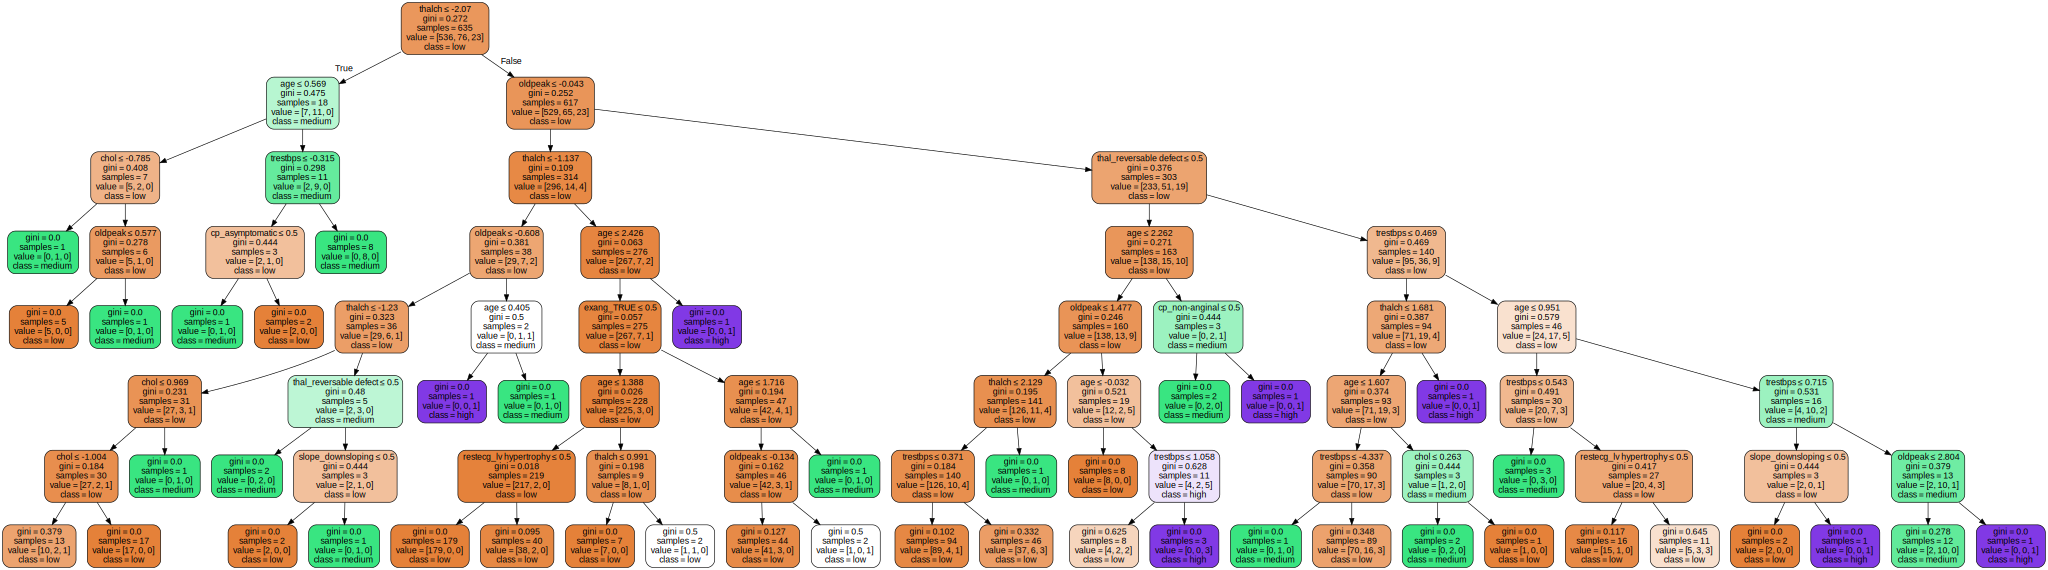

In [448]:
# Visualize the Decision tree structure
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(dt, out_file=None,
                         feature_names=X.columns,
                         class_names=['low','medium','high'],
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph
